# TUBES IF3111 Intelegensi Buatan - RB

14116133 Andi Ariyandi


14116106 Rina Katrina Naibaho

# Teknik Informatika - Institut Teknologi Sumatera

# 3.a. Membaca dataset standar iris

In [87]:
from sklearn import datasets

iris_data = datasets.load_iris()

    
print(iris_data.DESCR+"\n")
print(iris_data.feature_names)
print(iris_data.data)
print(iris_data.target_names)
print(iris_data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 3.a. Membaca dataset play-tennis

In [88]:
import pandas

tennis_data = pandas.read_csv('weather.nominal.csv')

tennis_data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# 3.b. Melakukan pembelajaran: NaiveBayes

In [106]:
from sklearn import datasets
iris_data = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier as MLP
import matplotlib.pyplot as plt
import numpy as np

X = iris_data.data
Y = iris_data.target
gnb = NB()
gnb.fit(X,Y)
iris_pred = gnb.predict(X)
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

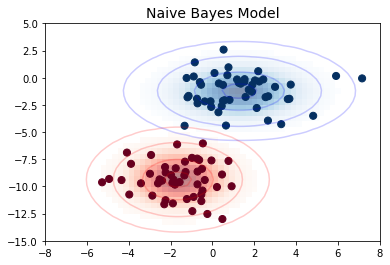

In [90]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)


# 3.b. Melakukan pembelajaran: DecisionTree ID3

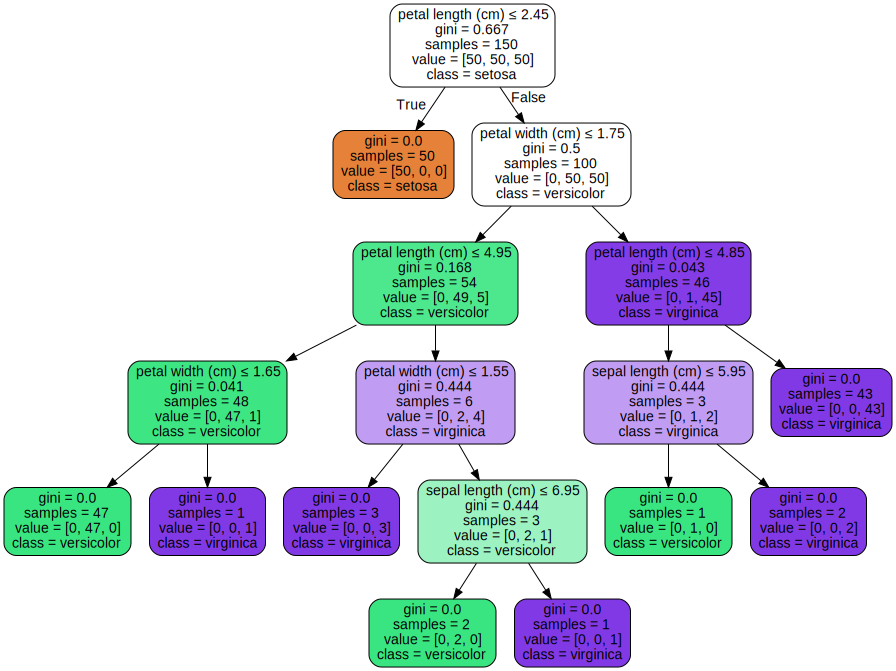

In [115]:
import graphviz
dtree = tree.DecisionTreeClassifier()
dtree.fit(iris_data.data, iris_data.target)

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


# 3.b. Melakukan pembelajaran: kNN

In [99]:
knn = KNN()
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

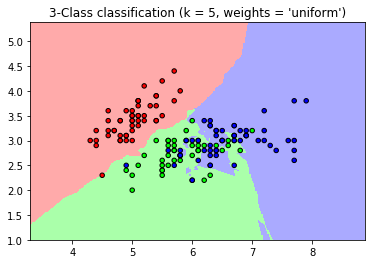

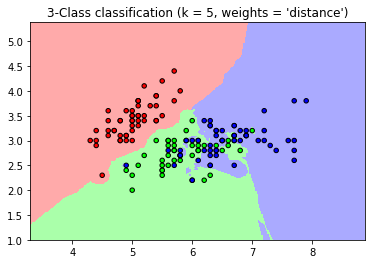

In [98]:
from matplotlib.colors import ListedColormap
import numpy as np
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02
n_neighbors = 5
X = iris_data.data[:, :2]

for weights in ['uniform', 'distance']:
    # Membuat Instance kalsifikasi Tetangga dan FIT
    clf = KNN(n_neighbors, weights=weights)
    clf.fit(X, Y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# 3.b. Melakukan pembelajaran: MLP

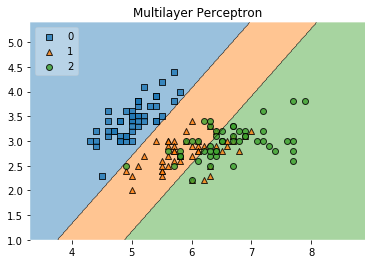

In [100]:
mlp = MLP(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
mlp.fit(X,Y)

from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=X, y=Y, clf=mlp, legend=2)
plt.title('Multilayer Perceptron')
plt.show()

# 3.c. skema split train 90% dan test 10% 

In [122]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

def perfMeasure(name, y_test,y_pred):
    print(name, "performance measure: ")
    print("- NB accuracy:",accuracy_score(y_pred=iris_pred,y_true=Y))
    print("- NB precision:",precision_score(y_pred=iris_pred,y_true=Y,average='micro'))
    print("- NB recall",recall_score(y_pred=iris_pred,y_true=Y,average='micro'))
    plt.figure
    plot_confusion_matrix(confusion_matrix(y_test, y_pred),iris.target_names,name)
    plt.show
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

# 3.c. skema split train 90% dan test 10% : NaïveBayes

NaiveBayes performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.8  0.2 ]
 [0.   0.17 0.83]]


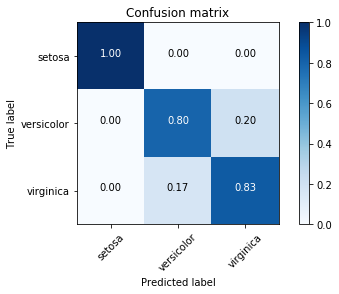

In [123]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

X_train90, X_test90, y_train90, y_test90 = train_test_split(X,y)

gnb90 = NB()
gnb90.fit(X_train90, y_train90)


perfMeasure('NaiveBayes',y_test90, gnb90.predict(X_test90))

# 3.c. skema split train 90% dan test 10% : DTL

DecisionTree performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]]


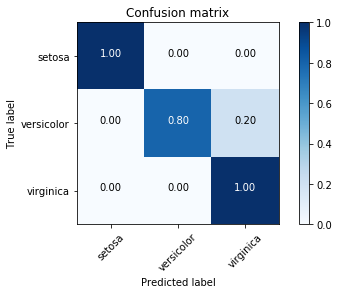

In [124]:
dt90 = tree.DecisionTreeClassifier()
dt90.fit(X_train90,y_train90)

perfMeasure('DecisionTree', y_test90, dt90.predict(X_test90))
plt.show()

# 3.c. skema split train 90% dan test 10% : KNN

k-NearestNeighbor performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.7 0.3]
 [0.  0.  1. ]]


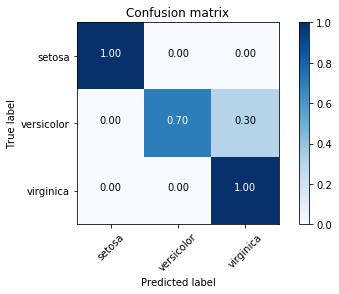

In [125]:
knn90 = KNN(n_neighbors=1)
knn90.fit(X_train90,y_train90)

perfMeasure('k-NearestNeighbor', y_test90, knn90.predict(X_test90))

# 3.c. skema split train 90% dan test 10% : MLP

k-NearestNeighbor performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.7 0.3]
 [0.  0.  1. ]]


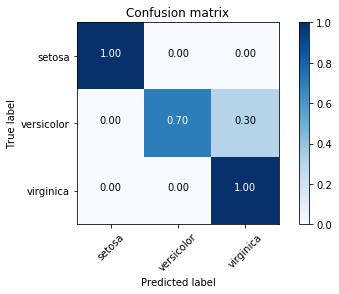

In [126]:
mlp90 = MLP(max_iter=100000)
mlp90.fit(X_train90, y_train90)

perfMeasure('k-NearestNeighbor', y_test90, knn90.predict(X_test90))

# 3.d. skema 10-fold cross validation : NaïveBayes

In [127]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
gnb = GaussianNB()
k_fold = KFold(n_splits=10)

i = 1
for train, test in k_fold.split(iris.data):
    scores = gnb.fit(iris.data[train], iris.target[train]).score(iris.data[test], iris.target[test])
    print('Scores Fold %s = %s' % (i, scores))
    i += 1

Scores Fold 1 = 1.0
Scores Fold 2 = 1.0
Scores Fold 3 = 1.0
Scores Fold 4 = 0.9333333333333333
Scores Fold 5 = 0.9333333333333333
Scores Fold 6 = 0.8666666666666667
Scores Fold 7 = 1.0
Scores Fold 8 = 0.8666666666666667
Scores Fold 9 = 0.8666666666666667
Scores Fold 10 = 1.0


# 3.d. skema 10-fold cross validation : DTL

In [128]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
neigh = DecisionTreeClassifier()
k_fold = KFold(n_splits=10)
i = 1
for train, test in k_fold.split(iris.data):
    scores = neigh.fit(iris.data[train], iris.target[train]).score(iris.data[test], iris.target[test])
    print('Scores Fold %s = %s' % (i, scores))
    i += 1

Scores Fold 1 = 1.0
Scores Fold 2 = 1.0
Scores Fold 3 = 1.0
Scores Fold 4 = 0.9333333333333333
Scores Fold 5 = 0.9333333333333333
Scores Fold 6 = 0.8666666666666667
Scores Fold 7 = 1.0
Scores Fold 8 = 0.8666666666666667
Scores Fold 9 = 0.8
Scores Fold 10 = 1.0


# 3.d. skema 10-fold cross validation :KNN

In [129]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
neigh = KNeighborsClassifier()
k_fold = KFold(n_splits=10)
i = 1
for train, test in k_fold.split(iris.data):
    scores = neigh.fit(iris.data[train], iris.target[train]).score(iris.data[test], iris.target[test])
    print('Scores Fold %s = %s' % (i, scores))
    i += 1

Scores Fold 1 = 1.0
Scores Fold 2 = 1.0
Scores Fold 3 = 1.0
Scores Fold 4 = 1.0
Scores Fold 5 = 0.8
Scores Fold 6 = 0.8666666666666667
Scores Fold 7 = 1.0
Scores Fold 8 = 0.8666666666666667
Scores Fold 9 = 0.8
Scores Fold 10 = 1.0


# 3.d. skema 10-fold cross validation : MLP

In [130]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
k_fold = KFold(n_splits=10)

i = 1
for train, test in k_fold.split(iris.data):
    scores = clf.fit(iris.data[train], iris.target[train]).score(iris.data[test], iris.target[test])
    print('Scores Fold %s = %s' % (i, scores))
    i += 1

Scores Fold 1 = 1.0
Scores Fold 2 = 1.0
Scores Fold 3 = 1.0
Scores Fold 4 = 1.0
Scores Fold 5 = 0.9333333333333333
Scores Fold 6 = 0.9333333333333333
Scores Fold 7 = 1.0
Scores Fold 8 = 0.9333333333333333
Scores Fold 9 = 0.6666666666666666
Scores Fold 10 = 1.0


# 3.e. Menyimpan (save) model/hipotesis ke file eksternal

In [131]:
from sklearn.externals import joblib
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


iris = datasets.load_iris()
gnb = GaussianNB()

fit_gnb = gnb.fit(iris.data, iris.target)
joblib.dump(fit_gnb, 'learningModel.pkl')

['learningModel.pkl']

# 3.f. Membaca (read)model/hipotesis dari file eksternal

In [133]:
from sklearn.externals import joblib
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

fit = joblib.load('learningModel.pkl')
y_predict = fit.predict(iris.data)
print('dengan Score  = %s' % (fit.score(iris.data, iris.target)))

dengan Score  = 0.96


# 3.g. Membuat instance baru

In [157]:
instance = [8.0, 7.0, 3.0, 5.0]

print (instance)

[8.0, 7.0, 3.0, 5.0]


# 3.h. Melakukan klasifikasi

In [144]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


from sklearn import tree
import graphviz
import tempfile

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


# 3.h. Melakukan klasifikasi : NaïveBayes

In [145]:
iris = datasets.load_iris()
gnb = GaussianNB()

fit1_gnb = gnb.fit(iris.data, iris.target)
y_predict = fit1_gnb.predict(iris.data)


# 3.h. Melakukan klasifikasi : DTL

In [146]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
clf = tree.DecisionTreeClassifier()
clf2 = clf.fit(X, Y)
clf2.predict(X)


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)

# 3.h. Melakukan klasifikasi : KNN

In [147]:
iris = datasets.load_iris()


X = iris.data 
y = iris.target

neigh3 = KNeighborsClassifier() 

neigh3.fit(X, y)
neigh3.predict(X)
print(neigh3.score(X,y))

0.9666666666666667


# 3.h. Melakukan klasifikasi : instance pada 3.g. - MLP

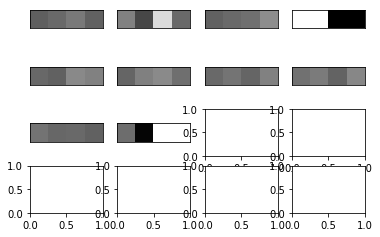

In [148]:
iris = datasets.load_iris()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
fit4_MLP = clf.fit(iris.data, iris.target)
y_predict = fit4_MLP.predict(iris.data)

#Visualisasi model
fig, axes = plt.subplots(4,4)
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(1,4), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

In [158]:
newinstance = [instance]

#Hasil klasifikasi NaiveBayes untuk instans baru
print ('Classification = %s' % (fit1_gnb.predict(newinstance)))

#Hasil klasifikasi Decisiontree untuk instans baru
print ('Classification = %s' % (clf2.predict(newinstance)))

#Hasil klasifikasi kNN untuk instans baru
print ('Classification = %s' % (neigh3.predict(newinstance)))

#Hasil klasifikasi MLP untuk instans baru
print ('Classification = %s' % (fit4_MLP.predict(newinstance)))

Classification = [2]
Classification = [1]
Classification = [2]
Classification = [1]
